In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('all-deals.csv')
# print all column names
print(df.columns.tolist())

['Record ID', 'Amount', 'Amount in company currency', 'Annual contract value', 'Annual recurring revenue', 'Campaign of last booking in meetings tool', 'Close Date', 'Closed Lost Reason', 'Closed Won Reason', 'Closer', 'Contract Request Date ', 'Create Date', 'Created by user ID', 'Cumulative time in " Paid (Appalachia (TN, OH, KY, WV, PA) )" (HH:mm:ss)', 'Cumulative time in "1st meeting scheduled  (SPED State Level )" (HH:mm:ss)', 'Cumulative time in "Circle Back  (Appalachia (TN, OH, KY, WV, PA) )" (HH:mm:ss)', 'Cumulative time in "Circle Back  (Northeast (NJ, RI, MA, NH, ME, VT, CT))" (HH:mm:ss)', 'Cumulative time in "Circle Back  (NYC Schools )" (HH:mm:ss)', 'Cumulative time in "Circle Back  (Pacific (CA, OR, WA))" (HH:mm:ss)', 'Cumulative time in "Circle Back  (Rocky Mountain (CO, UT, NV, ID, WY, MT))" (HH:mm:ss)', 'Cumulative time in "Circle Back  (South (LA, AR, AL, MS))" (HH:mm:ss)', 'Cumulative time in "Circle Back  (South East (NC, SC, TN, MS, AL, GA, FL))" (HH:mm:ss)', 'Cumu

In [11]:
df["Create Date"] = pd.to_datetime(df["Create Date"], format='mixed')
df["Close Date"] = pd.to_datetime(df["Close Date"], format='mixed')
df['Days to close'] = (df['Close Date'] - df['Create Date']).dt.days
df['Closed within 90 days'] = df['Days to close'] <= 90


Deal Stage
1st meeting scheduled     0.000000
Circle Back               0.000000
Circle Back               0.186441
Closed Lost               0.666667
Closed Lost               0.350000
Contract Issued           0.000000
Contract Issued           0.176471
Contract Signed           0.457143
Contract Signed           0.666667
Demo                      0.057143
Due w/n 60 days           0.000000
Due w/n 90 days           0.000000
Late Stage Meeting        0.000000
Late Stage Meeting        0.000000
Meeting Scheduled         0.000000
No Success                0.000000
Overdue Renewals          0.000000
Paid                      0.000000
Paid                      0.000000
Proposal                  0.000000
Name: Closed within 90 days, dtype: float64


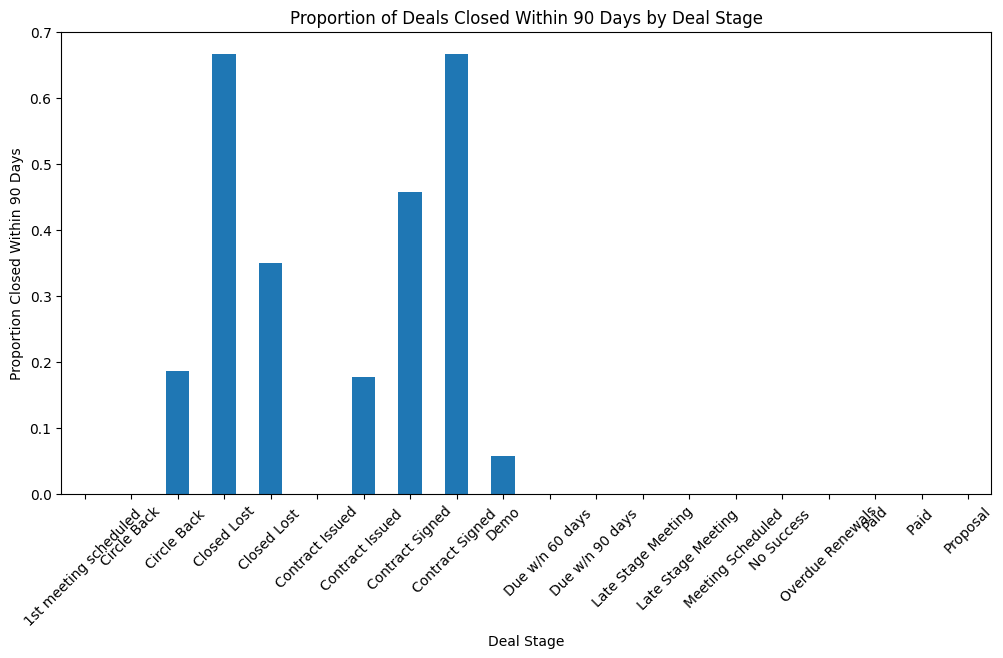

In [12]:
# Analyze the effect of Deal Stage
deal_stage_effect = df.groupby('Deal Stage')['Closed within 90 days'].mean()
print(deal_stage_effect)

deal_stage_effect.plot(kind='bar', figsize=(12, 6))
plt.title('Proportion of Deals Closed Within 90 Days by Deal Stage')
plt.xlabel('Deal Stage')
plt.ylabel('Proportion Closed Within 90 Days')
plt.xticks(rotation=45)
plt.show()

Closed within 90 days
False    15359.325140
True      9045.117647
Name: Amount, dtype: float64


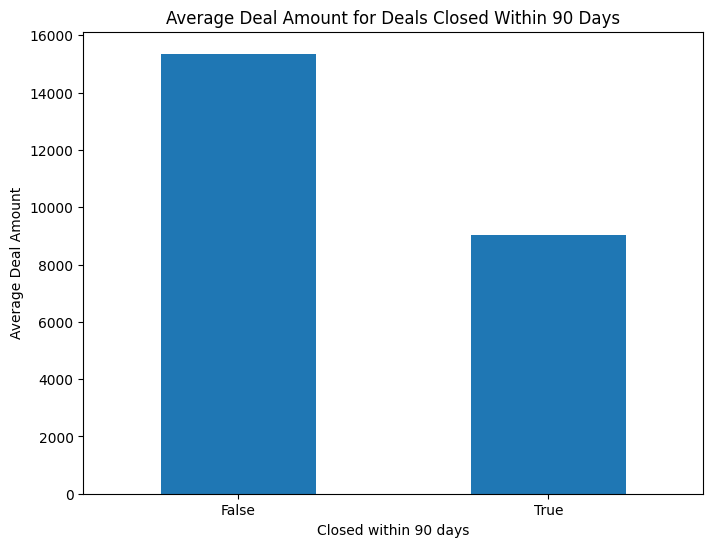

In [13]:
# Analyze the effect of Amount
amount_effect = df.groupby('Closed within 90 days')['Amount'].mean()
print(amount_effect)

amount_effect.plot(kind='bar', figsize=(8, 6))
plt.title('Average Deal Amount for Deals Closed Within 90 Days')
plt.xlabel('Closed within 90 days')
plt.ylabel('Average Deal Amount')
plt.xticks(rotation=0)
plt.show()



In [16]:
# Find relevant columns
selected_columns = [
    'Amount', 'Annual contract value', 'Annual recurring revenue',
    'Deal Stage', 'Deal probability', 'Deal Score', 'Number of Sales Activities',
    'Number of Associated Contacts', 'Number of Associated Line Items', 'Total contract value',
    'Weighted amount', 'Weighted amount in company currency', 'Closed within 90 days'
]

df_selected = df[selected_columns]
df_selected = df_selected.dropna()

# Split data into features and target
X = df_selected.drop(columns=['Closed within 90 days'])
y = df_selected['Closed within 90 days']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


NameError: name 'numeric_features' is not defined